In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import metrics
%matplotlib inline

data = pd.read_csv("Fortnite.csv")
df = pd.read_csv("rawData.csv")

/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
droppedLocations = data["Location"]
# creates a substring of only the first letter
firstLocation = droppedLocations[0][:1]

In [4]:
# retrives size of droppedLocations array
droppedLocations.size

# empty lists created to store x & y values of dropped locations respectively
xVals = []
yVals = []

for x in range(0, droppedLocations.size):
    quadrantLetter = droppedLocations[x][:1]
    quadrantNum = droppedLocations[x][1]
    # for the x values
    if (quadrantLetter == "A"):
        xVals.append(1)
    elif (quadrantLetter == "B"):
        xVals.append(2)
    elif (quadrantLetter == "C"):
        xVals.append(3)
    elif (quadrantLetter == "D"):
        xVals.append(4)
    elif (quadrantLetter == "E"):
        xVals.append(5)
    elif (quadrantLetter == "F"):
        xVals.append(6)
    elif (quadrantLetter == "G"):
        xVals.append(7)
    elif (quadrantLetter == "H"):
        xVals.append(8)
    elif (quadrantLetter == "I"):
        xVals.append(9)
    elif (quadrantLetter == "J"):
        xVals.append(10)
    
    # for the y values
    if (quadrantNum == "1"):
        yVals.append(1)
    elif (quadrantNum == "2"):
        yVals.append(2)
    elif (quadrantNum == "3"):
        yVals.append(3)
    elif (quadrantNum == "4"):
        yVals.append(4)
    elif (quadrantNum == "5"):
        yVals.append(5)
    elif (quadrantNum == "6"):
        yVals.append(6)
    elif (quadrantNum == "7"):
        yVals.append(7)
    elif (quadrantNum == "8"):
        yVals.append(8)
    elif (quadrantNum == "9"):
        yVals.append(9)
    elif (quadrantNum == "10"):
        yVals.append(10)
    

In [5]:
# xVals stores the corresponding numbers of the lettered quadrants
# yVals stores the corresponding numbers of the numbered quadrants

# list containing ordered pairs of the coordinates
coordinates = []

# creates array/list of ordered pairs of the coordinates from xVals and yVals
for x in range(0, droppedLocations.size):
    coords = tuple([xVals[x], yVals[x]])
    coordinates.append(coords)

In [6]:
cm = metrics.confusion_matrix(yVals, xVals)
practice_cm = cm

if (practice_cm[0][0] > 0):
    practice_cm[0][0] = 0
if (practice_cm[7][0] > 0):
    practice_cm[7][0] = 0
if (practice_cm[8][0] > 0):
    practice_cm[8][0] = 0
if (practice_cm[9][0] > 0):
    practice_cm[9][0] = 0
if (practice_cm[7][1] > 0):
    practice_cm[7][1] = 0
if (practice_cm[8][1] > 0):
    practice_cm[8][1] = 0
if (practice_cm[9][2] > 0):
    practice_cm[9][2] = 0
if (practice_cm[0][4] > 0):
    practice_cm[0][4] = 0
if (practice_cm[0][5] > 0):
    practice_cm[0][5] = 0
if (practice_cm[0][6] > 0):
    practice_cm[0][6] = 0
if (practice_cm[0][7] > 0):
    practice_cm[0][7] = 0
if (practice_cm[0][8] > 0):
    practice_cm[0][8] = 0
if (practice_cm[9][8] > 0):
    practice_cm[9][8] = 0
if (practice_cm[0][9] > 0):
    practice_cm[0][9] = 0
if (practice_cm[8][9] > 0):
    practice_cm[8][9] = 0
if (practice_cm[9][9] > 0):
    practice_cm[9][9] = 0
    
practice_cm[9][5] = 28
practice_cm[9][6] = 6
    
practice_cm

array([[  0,   6,   0,   4,   0,   0,   0,   0,   0,   0],
       [  8,  24,  12,  18,   2,  26,  12,   6,   8,   6],
       [  8,  14,  43,   4,   4,  14,  10,   8,  18,   0],
       [  6,   2,   4,   4,  20,   6,   8,  12,   6,   2],
       [ 35,   0,  14, 124,   0,  14,   2,   2,   2,  10],
       [ 18,   2,   2,  20,   4,   6,  18,  56,   2,   6],
       [ 10,   4,  20,  38,   2,  58,   6,   4,   4,   2],
       [  0,   0,   0,   8,   6,  14,  20,  16,  26,   0],
       [  0,   0,   0,  14,  16,   2,   4,   0,   6,   0],
       [  0,   0,   0,   0,   0,  28,   6,   0,   0,   0]])

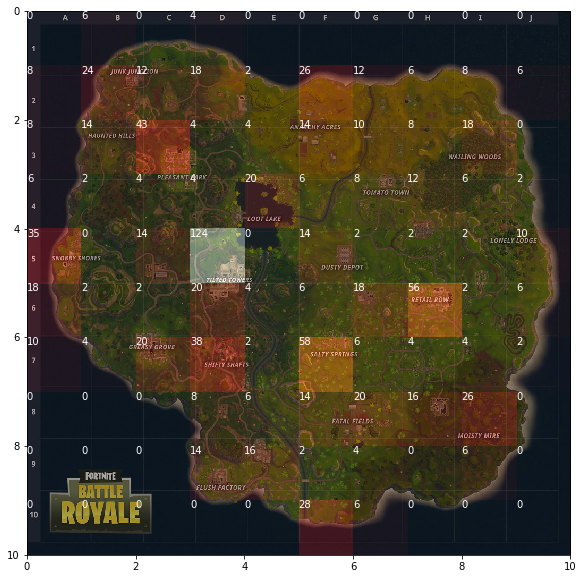

In [8]:
plt.subplots(figsize=(10,10))
implot = plt.imshow(plt.imread("./fortnite_map.jpg"), aspect='auto', extent=[0,10,10,0])

cm = metrics.confusion_matrix(yVals, xVals)

width, height = cm.shape

for x in range(width):
    for y in range(height):
        text = plt.text(y, x, practice_cm[x,y],
                       ha="left", va="top", color='w')

plt.imshow(practice_cm, alpha=0.35, cmap='hot', extent=[0,10,10,0])